In [1]:
import matplotlib.gridspec as gspec
import numpy as np
import matplotlib.pyplot as plt
import site
site.load

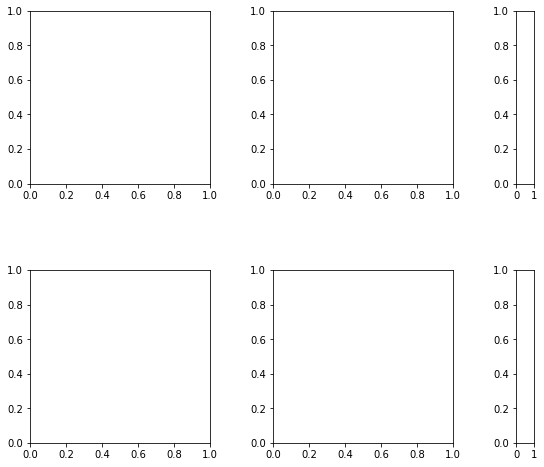

In [32]:
panel_length = 2
nrows = 2
ncols = 3
xborder = [0.5, 0.5]
yborder = [0.5, 0.5]
panel_bt = [1, 1]
width_ratios = np.array([1, 1, 0.1]) * panel_length
height_ratios = np.array([1, 1]) * panel_length
figwidth = np.sum(width_ratios) + panel_bt[0] * np.mean(width_ratios) * (ncols - 1) + \
        np.sum(xborder) * panel_length
figheight = np.sum(height_ratios) + panel_bt[1] * np.mean(height_ratios) * (nrows - 1) + \
        yborder[0] + yborder[1]
fig = plt.figure(figsize=(figwidth, figheight))
gs = gspec.GridSpec(nrows, ncols, left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
                top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
                wspace=panel_bt[0]/panel_length, hspace=panel_bt[1]/panel_length,
                height_ratios = height_ratios, width_ratios = width_ratios)
axes = np.empty((nrows, ncols), dtype = object)

for i in range(nrows):
    for j in range(ncols):
        idx = (i, j)

        axis = fig.add_subplot(gs[idx])
        axes[idx] = axis

In [33]:
def pgs():
    sp = gs.get_subplot_params()
    params = {'wspace':sp.wspace, 'hspace':sp.hspace, 'left':sp.left,
             'right':sp.right, 'top':sp.top, 'bottom':sp.bottom}
    print(params)
    return

In [34]:
pgs()

{'wspace': 0.5, 'hspace': 0.5, 'left': 0.0625, 'right': 0.9375, 'top': 0.9285714285714286, 'bottom': 0.07142857142857142}


In [31]:
bbox = axes[0,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
print(bbox.width, bbox.height)

2.214285714285714 2.0000000000000004


In [21]:
fig.get_size_inches()

array([5.5, 4. ])

In [39]:
flatax = axes.flatten()
np.unravel_index(2, axes.shape)

(0, 2)

In [40]:
x = np.ones((5,5))
x[2:, 3:5] = 2

In [46]:
unq, idx, inv = np.unique(x, return_index = True, return_inverse = True)

In [47]:
idx

array([ 0, 13])

In [108]:
def _makeFig(nrows, ncols, panel_length, wspace,
        hspace, xborder, yborder, height_ratios = None, 
        width_ratios = None, dpi = 100):
    """
    Make a gridspec and corresponding figure according to the
    given specifications.

    Args:
        nrows (int): number of rows
        ncols (int): number of columns
        panel_length (float): size of panel in inches.
            Used to scale the other inputs.
        wspace (float, np.array): the width of the padding
            between panels, as a fraction of panel_length.
            If a float, applies that value to all padding.
            An array must have dimensions (ncols - 1).
        hspace (float, np.array): the height of the padding
            between panels, as a fraction of panel_length.
            If a float, applies that value to all padding.
            An array must have dimensions (nrows - 1).
        xborder (float, np.array): the size of the padding
            on the left and right borders of the figure.
            As a fraction of panel_length. If given a float,
            applies that value to both borders.
        yborder (float, np.array): the size of the padding
            on the top and bottom borders of the figure.
            As a fraction of panel_length. If given a float,
            applies that value to both borders.
        height_ratios (list, np.array, optional): the 
            respective heights of each the panels in the 
            corresponding rows. Must have dimensions (nrows). 
            As a fraction of panel_length. 
        width_ratios (list, np.array, optional): the respective heights
            of each the panels in the corresponding rows. Must
            have dimensions (nrows). As a fraction of 
            panel_length. 
        dpi (float, optional): dots per inch, the resolution of the
            figure.
    """

    # default behavior for borders
    if isinstance(xborder, float) or isinstance(xborder, int):
        xborder = np.array([xborder, xborder])
    if isinstance(yborder, float) or isinstance(yborder, int):
        yborder = np.array([yborder, yborder])

    # default behavior for padding
    paddim = [max(1, ncols - 1), max(1, nrows - 1)]
    if isinstance(wspace, float) or isinstance(wspace, int):
        wspace = np.ones(paddim[0]) * wspace
    if isinstance(hspace, float) or isinstance(hspace, int):
        hspace = np.ones(paddim[1]) * hspace

    # default behavior for ratios
    if height_ratios is None:
        height_ratios = np.ones(nrows)
    else:
        # renormalize
        maxval = np.max(height_ratios)
        height_ratios /= maxval

    if width_ratios is None:
        width_ratios = np.ones(ncols)
    else:
        #renormalize
        maxval = np.max(width_ratios)
        width_ratios /= maxval

    #TODO handle input errors with panelbt, height/width ratios

    # creating Figure object

    # convert everything into units of inches
    width_ratios *= panel_length; height_ratios *= panel_length
    xborder *= panel_length; yborder *= panel_length
    wspace *= panel_length; hspace *= panel_length
    
    total_widths = np.sum(width_ratios)
    total_wspace = np.sum(wspace)
    wborder_space = np.sum(xborder)

    total_heights = np.sum(height_ratios)
    total_hspace = np.sum(hspace)
    hborder_space = np.sum(yborder)
    
    # get figwidth and figheight in inches
    figwidth = total_widths + total_wspace + wborder_space
    figheight = total_heights + total_hspace + hborder_space 

    fig = plt.figure(figsize=(figwidth, figheight), dpi = dpi)
    
    print(figwidth, figheight)
    
    axes = np.empty((nrows, ncols), dtype = object)
    for i in range(nrows):
        for j in range(ncols):
            # a label makes each axis unique - otherwise mpl will
            # return a previously made axis
            
            ax = fig.add_subplot(label = str((i, j)))
            
            
            height = height_ratios[i]
            width = width_ratios[j]
            
            total_hspace = np.sum(hspace[:i])
            total_heights = np.sum(height_ratios[:i+1])
            total_widths = np.sum(width_ratios[:j])
            total_wspace = np.sum(wspace[:j])
            
            bot = figheight - yborder[0] - total_hspace - total_heights
            left = xborder[0] + total_widths + total_wspace
            
                
#             if j == 0:
#                 left = xborder[0]
#             else:
#                 left += width_ratios[j-1] + wspace[j-1]
            axdim = [left, bot, 
                     width, height]
            print(axdim)
            ax.set_position([left / figwidth, bot / figheight, width / figwidth, height / figheight])
            axes[i, j] = ax
            pos = ax.get_position()
            print(pos.x0, pos.y0, pos.width, pos.height)
                
    return fig

1.5 1.0
[0.0, 0.5, 0.5, 0.5]
0.0 0.5 0.3333333333333333 0.5
[0.5, 0.5, 0.5, 0.5]
0.3333333333333333 0.5 0.3333333333333333 0.5
[1.0, 0.5, 0.5, 0.5]
0.6666666666666666 0.5 0.33333333333333337 0.5
[0.0, 0.0, 0.5, 0.5]
0.0 0.0 0.3333333333333333 0.5
[0.5, 0.0, 0.5, 0.5]
0.3333333333333333 0.0 0.3333333333333333 0.5
[1.0, 0.0, 0.5, 0.5]
0.6666666666666666 0.0 0.33333333333333337 0.5


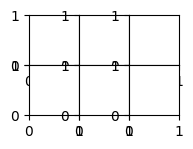

In [109]:
fig = _makeFig(2, 3, 0.5, 0, 0, 0.0, 0.0)


In [71]:
fig.savefig('example')